In [95]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import itertools

from scipy.stats import pearsonr, spearmanr, zscore
from sklearn.metrics import r2_score

import os
from statsmodels.stats.multitest import multipletests

from tqdm import tqdm
import subprocess as sp

In [1]:
'a'

'a'

In [2]:
slopes1 = pd.read_csv('../code/IntronSlopes/slopes/NA19137.IntronWindows.glm_nb.tab.gz',
                     sep='\t', index_col=0)

slopes1 = slopes1.dropna()

slopes2 = pd.read_csv('../code/IntronSlopes/slopes/NA19238.IntronWindows.glm_nb.tab.gz',
                     sep='\t', index_col=0)

slopes2 = slopes2.dropna()

In [5]:
def plot_slopes(sample1, sample2, method='spearman'):
    
    
    slopes1 = sample1.Slope
    slopes2 = sample2.Slope
    
    
    fig, ax = plt.subplots(figsize=(5, 5))
    
    
    vmax = np.max((np.max(slopes1), np.max(slopes2))) 
    vmin = np.min((np.min(slopes1), np.min(slopes2))) 
    
    pad = np.abs(vmax - vmin)/20
    
    vmax += pad
    
    vmin = vmin - pad
    
    
    ax.plot([vmin, vmax], [0,0], 'r--', alpha=0.5)
    ax.plot([0,0], [vmin, vmax], 'r--', alpha=0.5)
    ax.scatter(slopes1, slopes2, c='black', alpha=0.2, linewidth=0)
    
#     r2 = round(r2_score(slopes1, slopes2),2)
#     ax.text(0.8, 0.1,'R2 = ' + str(r2), ha='center', va='center', transform=ax.transAxes)
    
    if method == 'spearman':
        r2 = round(spearmanr(slopes1, slopes2)[0],2)
        ax.text(0.8, 0.15,'Spearman', ha='center', va='center', transform=ax.transAxes)
        ax.text(0.8, 0.1,'r = ' + str(r2), ha='center', va='center', transform=ax.transAxes)
        
    elif method == 'pearson':
        r2 = round(pearsonr(slopes1, slopes2)[0],2)
        ax.text(0.8, 0.15,'Pearson', ha='center', va='center', transform=ax.transAxes)
        ax.text(0.8, 0.1,'r = ' + str(r2), ha='center', va='center', transform=ax.transAxes)
        
    elif method == 'r2_score':
        r2 = round(r2_score(slopes1, slopes2),2)
#         ax.text(0.8, 0.15,'Spearman', ha='center', va='center', transform=ax.transAxes)
        ax.text(0.79, 0.1,'R2 = ' + str(r2), ha='center', va='center', transform=ax.transAxes)
    
    
    
    
    neg_neg = round(np.mean(sample1.IsSlopeNegative & sample2.IsSlopeNegative)*100)
    neg_pos = round(np.mean(sample1.IsSlopeNegative & ~sample2.IsSlopeNegative)*100)
    pos_neg = round(np.mean(~sample1.IsSlopeNegative & sample2.IsSlopeNegative)*100)
    pos_pos = round(100 - neg_neg - neg_pos - pos_neg)
    
    if (neg_neg >= 0 ) and (neg_neg < 1 ):
        neg_neg = '<1'
    if (neg_pos >= 0 ) and (neg_pos < 1 ):
        neg_pos = '<1'
    if (pos_neg >= 0 ) and (pos_neg < 1 ):
        pos_neg = '<1'
    if (pos_pos >= 0 ) and (pos_pos < 1 ):
        pos_pos = '<1'
    
    ax.text(0.06, 0.03, str(neg_neg) + '%', ha='center', va='center', transform=ax.transAxes)
    
    ax.text(0.06, 0.96, str(neg_pos) + '%', ha='center', va='center', transform=ax.transAxes)
    
    ax.text(0.94, 0.03, str(pos_neg) + '%', ha='center', va='center', transform=ax.transAxes)
    
    ax.text(0.94, 0.96, str(pos_pos) + '%', ha='center', va='center', transform=ax.transAxes)
    
    
    ax.set_xlim((vmin, vmax))
    ax.set_ylim((vmin, vmax))
    ax.set_xlabel('NA19137')
    ax.set_ylabel('NA18855')
    ax.set_title('Slopes 100 windows')
    plt.show()

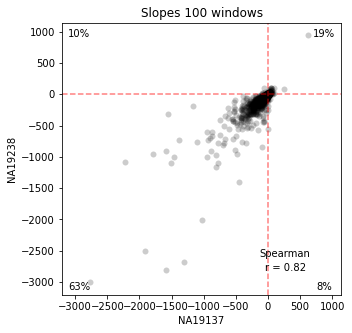

In [4]:
# slopes1 = slopes1.loc[(slopes1.coverageMean >= 0.95) & (slopes1.counts >= 1000) & (slopes1.IntronLength >= 10000)].copy()
# slopes2 = slopes2.loc[(slopes2.coverageMean >= 0.95) & (slopes2.counts >= 1000) & (slopes2.IntronLength >= 10000)].copy()

shared_idx = slopes1.dropna().index.intersection(slopes2.dropna().index)
plot_slopes(slopes1.loc[shared_idx], slopes2.loc[shared_idx], method='spearman')

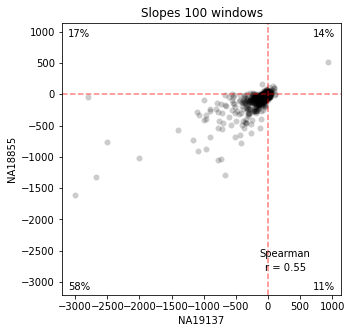

In [8]:
slopes2 = pd.read_csv('../code/IntronSlopes/slopes/NA18855.IntronWindows.glm_nb.tab.gz',
                     sep='\t', index_col=0)

slopes2 = slopes2.dropna()

slopes1 = pd.read_csv('../code/IntronSlopes/slopes/NA19238.IntronWindows.glm_nb.tab.gz',
                     sep='\t', index_col=0)

slopes1 = slopes1.dropna()


shared_idx = slopes1.dropna().index.intersection(slopes2.dropna().index)
plot_slopes(slopes1.loc[shared_idx], slopes2.loc[shared_idx], method='spearman')

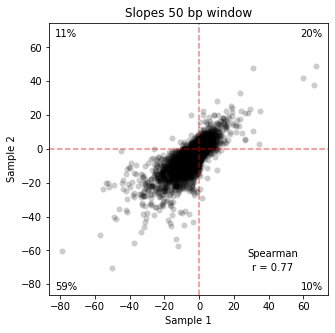

In [122]:
slopes1_sig = slopes1['std.error'].sort_values()[:10000].index
slopes2_sig = slopes2['std.error'].sort_values()[:10000].index

shared_sig = slopes1_sig.intersection(slopes2_sig)

plot_slopes(slopes1.loc[shared_sig], slopes2.loc[shared_sig], 'spearman')

In [90]:
shared_sig

Index(['ENSG00000158623.14_chr7_130550649_130551240_-',
       'ENSG00000128512.23_chr7_112004131_112206101_-',
       'ENSG00000169213.7_chr1_51937412_51976889_-',
       'ENSG00000164161.10_chr4_144659838_144706530_+',
       'ENSG00000134532.19_chr12_23665564_23734683_-',
       'ENSG00000124203.6_chr20_59207056_59252977_+',
       'ENSG00000107957.16_chr10_103767169_103801281_-',
       'ENSG00000157570.12_chr11_44860469_44906406_+',
       'ENSG00000114757.19_chr3_179819976_179859061_-',
       'ENSG00000120594.17_chr10_20177409_20211668_+',
       ...
       'ENSG00000140836.17_chr16_72800129_72811576_-',
       'ENSG00000188959.9_chr9_110201474_110207386_-',
       'ENSG00000008277.14_chr7_88156006_88163011_+',
       'ENSG00000055130.17_chr7_148730262_148753975_+',
       'ENSG00000119977.21_chr10_95664300_95680471_-',
       'ENSG00000163354.15_chr1_155018760_155023116_-',
       'ENSG00000104205.16_chr8_66831311_66835762_+',
       'ENSG00000133265.11_chr19_55266286_55274397_

In [123]:
slopes2.loc['ENSG00000184384.14_chr11_96093517_96341382_-']

gene               ENSG00000184384.14
IntChr                          chr11
IntStart                     96093517
IntStop                      96341382
IntStrand                           -
(Intercept)               2116.034923
Slope                    -1961.708719
IntronLength                   247865
std.error                   80.710516
counts                         113004
coverageMean                      1.0
IsSlopeNegative                  True
Name: ENSG00000184384.14_chr11_96093517_96341382_-, dtype: object

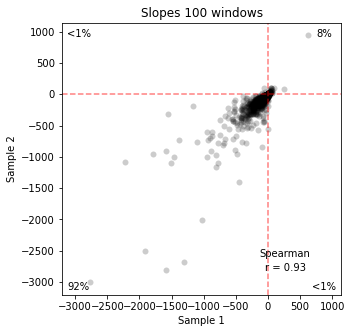

In [14]:
# slopes1 = slopes1.loc[(slopes1.coverageMean >= 0.9) & (slopes1.counts >= 10000) & (slopes1.IntronLength >= 10000)].copy()
# slopes2 = slopes2.loc[(slopes2.coverageMean >= 0.9) & (slopes2.counts >= 10000) & (slopes1.IntronLength >= 10000)].copy()

s1_fdr = multipletests(slopes1.dropna()['Slope.p.value'], method='fdr_bh', alpha=0.25)
slopes1['Slope.FDR'] = s1_fdr[1]
slopes1['Slope.IsSignificant'] = s1_fdr[0]
intercept1_fdr = multipletests(slopes1.dropna()['Intercept.p.value'], method='fdr_bh', alpha=0.25)
slopes1['Intercept.FDR'] = intercept1_fdr[1]
slopes1['Intercept.IsSignificant'] = intercept1_fdr[0]
slopes1['IsSignificant'] = slopes1['Slope.IsSignificant'] & slopes1['Intercept.IsSignificant']
slopes1_sig = slopes1.loc[slopes1.IsSignificant].index

s2_fdr = multipletests(slopes2.dropna()['Slope.p.value'], method='fdr_bh', alpha=0.25)
slopes2['Slope.FDR'] = s2_fdr[1]
slopes2['Slope.IsSignificant'] = s2_fdr[0]
intercept2_fdr = multipletests(slopes2.dropna()['Intercept.p.value'], method='fdr_bh', alpha=0.25)
slopes2['Intercept.FDR'] = intercept2_fdr[1]
slopes2['Intercept.IsSignificant'] = intercept2_fdr[0]
slopes2['IsSignificant'] = slopes2['Slope.IsSignificant'] & slopes2['Intercept.IsSignificant']
slopes2_sig = slopes2.loc[slopes2.IsSignificant].index

shared_sig = slopes1_sig.intersection(slopes2_sig)

plot_slopes(slopes1.loc[shared_sig], slopes2.loc[shared_sig], 'spearman')

In [16]:
shared_sig

Index(['ENSG00000000419.12_chr20_50948662_50955185_-',
       'ENSG00000001629.10_chr7_92246519_92294888_+',
       'ENSG00000001629.10_chr7_92352642_92362184_+',
       'ENSG00000001629.10_chr7_92371607_92386508_+',
       'ENSG00000001631.15_chr7_92214777_92221901_-',
       'ENSG00000002549.12_chr4_17588977_17595409_+',
       'ENSG00000002587.10_chr4_11400113_11428698_-',
       'ENSG00000002822.15_chr7_1816228_1898199_-',
       'ENSG00000002822.15_chr7_1957719_1980452_-',
       'ENSG00000002822.15_chr7_2069338_2149151_-',
       ...
       'ENSG00000277149.5_chr7_72777533_72802399_-',
       'ENSG00000278540.5_chr17_37162050_37179259_-',
       'ENSG00000283199.3_chr13_113956839_113964926_-',
       'ENSG00000283886.3_chr9_39818924_39873909_-',
       'ENSG00000284484.1_chr16_75661249_75669362_-',
       'ENSG00000284512.1_chr16_81024605_81034754_-',
       'ENSG00000285441.1_chr6_159730965_159748537_-',
       'ENSG00000285458.1_chr4_86926326_86932221_-',
       'ENSG0000028586

In [38]:
len(slopes1.loc[(slopes1.coverageMean >= 0.25) & (slopes1.counts >= 10)])#.IsSlopeNegative.mean()

8012

In [27]:
slopes2.loc[slopes2.coverageMean >= 0.9]

,Gene,IntChr,IntStart,IntStop,IntStrand,Intercept,Slope,IntronLength,Slope.p.value,Intercept.p.value,counts,coverageMean,IsSlopeNegative,Slope.FDR,Slope.IsSignificant,Intercept.FDR,Intercept.IsSignificant,IsSignificant
IntronName,,,,,,,,,,,,,,,,,,
ENSG00000019582.15_chr5_150407324_150412624_-,ENSG00000019582.15,chr5,150407324,150412624,-,8.470250,-0.000239,5300,0.490454,1.532098e-14,799,0.962264,True,1.0,False,5.574980e-13,True,False
ENSG00000110777.12_chr11_111354575_111357444_-,ENSG00000110777.12,chr11,111354575,111357444,-,5.361076,-0.000027,2869,0.956565,2.133932e-10,282,0.913793,True,1.0,False,4.908800e-09,True,False
ENSG00000137265.15_chr6_398935_401423_+,ENSG00000137265.15,chr6,398935,401423,+,10.580373,-0.000481,2488,0.736331,1.331493e-06,448,0.900000,True,1.0,False,1.639515e-05,True,False
ENSG00000137265.15_chr6_401777_405017_+,ENSG00000137265.15,chr6,401777,405017,+,5.650186,-0.000435,3240,0.383684,8.313401e-09,302,0.938462,True,1.0,False,1.535779e-07,True,False
ENSG00000157601.14_chr21_41441025_41441715_+,ENSG00000157601.14,chr21,41441025,41441715,+,2.457437,-0.001087,690,0.633048,9.337091e-03,27,0.928571,True,1.0,False,3.294166e-02,True,False


In [129]:
slopes = pd.read_csv("../code/IntronSlopes/IntronWindowCounts/NA18522.IntronWindows.bed.gz", sep='\t',
                     names = ['chrom', 'start', 'end', 'bin', 'score', 'strand', 'counts'])

In [146]:
intron = ['_'.join(i.split('_')[:-1]) for i in slopes.bin]

In [147]:
slopes['intron'] = intron

In [148]:
sum_counts = slopes.groupby('intron').sum('counts')

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from scipy.stats import zscore
from tqdm import tqdm
import vcf
import subprocess as sp
import seaborn as sns
from scipy.stats import zscore

In [3]:
slopeQTLs = pd.read_csv('../code/QTLs/QTLTools/chRNA.Slopes/PermutationPass.FDR_Added.txt.gz', sep=' ', index_col=0)#,
#                    names = ['phe_id', 'phe_chr', 'phe_from', 'phe_to', 'phe_strd', 
#                             'n_var_in_cis', 'dist_phe_var', 'var_id', 'var_chr', 
#                             'var_from', 'var_to', 'dof1', 'dof2', 'bml1', 'bml2', 
#                             'nom_pval', 'slope', 'adj_emp_pval', 'adj_beta_pval', 'q'])

# slopeQTLs.index = [x.split('.')[-1] for x in slopeQTLs.index]
# slopeQTLs = slopeQTLs.dropna()

In [4]:
slopes_qqnormed = pd.read_csv('../code/QTLs/QTLTools/chRNA.Slopes/OnlyFirstRepsForColoc.sorted.qqnorm.bed.gz', sep='\t')
# slopes = pd.read_csv('../code/chRNAseq/intronSlopes.bed', sep='\t')
# slopes = slopes[slopes_qqnormed.columns.intersection(slopes.columns)]


In [5]:
sig_introns = list(slopeQTLs.index[slopeQTLs.q <= 0.1]) + ['ENSG00000184384.14_chr11_96093517_96341382_-']


In [6]:
len(sig_introns)

48

In [29]:
# lslopeQTLs.loc[sig_introns]

In [36]:
slopes_qqnormed.columns[6:]

Index(['strand', 'NA19214', 'NA18876', 'NA19096', 'NA19153', 'NA19152',
       'NA19209', 'NA19143', 'NA19138', 'NA18877', 'NA18909', 'NA19107',
       'NA18507', 'NA19137', 'NA19203', 'NA19119', 'NA18934', 'NA19141',
       'NA19150', 'NA18867', 'NA19092', 'NA18923', 'NA19201', 'NA19114',
       'NA19236', 'NA18868', 'NA19121', 'NA18519', 'NA18522', 'NA18497',
       'NA19238', 'NA18508', 'NA18510', 'NA18523', 'NA19093', 'NA18486',
       'NA18910', 'NA19101', 'NA18520', 'NA19239', 'NA19131', 'NA19257',
       'NA19108', 'NA19122', 'NA19190', 'NA19213', 'NA19099', 'NA18502',
       'NA18498', 'NA19102', 'NA19117', 'NA18862', 'NA18870', 'NA18879',
       'NA19198', 'NA18499', 'NA19118', 'NA18504', 'NA19160', 'NA18915',
       'NA18858', 'NA19247', 'NA19140', 'NA18913', 'NA18924', 'NA19225',
       'NA19210', 'NA18881', 'NA19171', 'NA18853', 'NA18511', 'NA19207',
       'NA19128', 'NA19147', 'NA18855', 'NA18864', 'NA19184', 'NA19127',
       'NA19130', 'NA18516', 'NA18505', 'NA18852', '

In [7]:
def filter_vcf(vcf_file, region_list, out='filtered.vcf'):
    query_split = [x.split(':') for x in region_list]
    query = ['chr' + x[0] + ':' + x[1] for x in query_split]
    query = ','.join(query)
    
    cmd = 'bcftools view -r ' + query + ' ' + vcf_file + ' > ' + out
        
    sp.run(cmd, shell=True)
    
    
vcf_file = '../code/QTLs/QTLTools/chRNA.Slopes/Genotypes/WholeGenome.vcf.gz'

filter_vcf(vcf_file, list(slopeQTLs.loc[sig_introns].var_id))

# slopes_sig = slopes_qqnormed.loc[sig_introns]


vcf = pd.read_csv('filtered.vcf', skiprows=119, sep='\t', index_col=2)
samples = slopes_qqnormed.columns[6:].intersection(vcf.columns)

In [8]:
len(samples)

87

In [9]:
def plot_SNP(vcf, slopes, sQTLs, intron):
    
    samples = slopes.columns
    snp = sQTLs.loc[intron, 'var_id']
    dfSNP = pd.DataFrame(vcf.loc[snp, samples])
    dfSNP['slope'] = list(slopes.loc[intron, samples])
    zygosity = []
    
    var1 = snp.split(':')[-2]
    var2 = snp.split(':')[-1]
    
    zygosity_order = []
    
    for idx, row in dfSNP.iterrows():
#         return idx, row
        if row[snp] == '0|0':
            zygosity.append(var1 + ',' + var1)
            zygosity_order.append(0)
        elif ((row[snp] == '0|1') or (row[snp] == '1|0')):
            zygosity.append(var1 + ',' + var2)
            zygosity_order.append(1)
        else:
            zygosity.append(var2 + ',' + var2)
            zygosity_order.append(2)

    dfSNP['zygosity'] = zygosity
    dfSNP['zygosity_order'] = zygosity_order
    
    dfSNP = dfSNP.sort_values('zygosity_order')
    
#     dfSNP

    print(snp)

    sns.boxplot(x="zygosity", y="slope", data=dfSNP, palette=x)
    sns.swarmplot(x="zygosity", y="slope", data=dfSNP, color=".25")
    intron_split = intron.split('_')
    intron_name = intron_split[1] + ':' + intron_split[2] + '-' + intron_split[3] + ':' + intron_split[4]
    plt.title(intron_name)
    plt.xlabel('SNP: ' + snp)
    plt.ylabel('slope qqnorm')
#     plt.savefig('plots/' + intron + '.png', dpi = 300)
    plt.show()
    
    return var1, var2

In [10]:
x = sns.color_palette("tab10")

In [11]:
x

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

Text(0, 0.5, 'Counts')

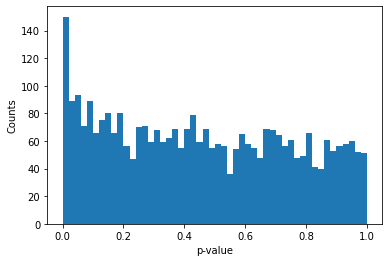

In [12]:
plt.hist(slopeQTLs.adj_beta_pval, bins=50)
plt.xlabel('p-value')
plt.ylabel('Counts')

In [13]:
valid_SNPs = np.array([x for x in slopeQTLs.loc[sig_introns].var_id if x in vcf.index])
valid_introns = [x[0] for x in slopeQTLs.loc[sig_introns].iterrows() if x[1].var_id in vcf.index]

In [14]:
slopes_qqnormed = slopes_qqnormed.set_index('pid')


In [145]:
# f = plot_SNP(vcf, slopes_qqnormed[samples], slopeQTLs, intron_idx)

In [143]:
f

('NA18876',
 12:71895390:T:C         0|0
 slope              0.758293
 Name: NA18876, dtype: object)

In [20]:
slopes_qqnormed.index = [x.split(':')[0] for x in slopes_qqnormed.index]

ENSG00000134852.15_chr4_55510065_55545452_-
4:55530648:G:A


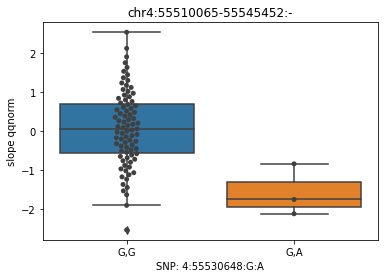

ENSG00000139734.19_chr13_59861536_59879228_-
13:59812260:C:G


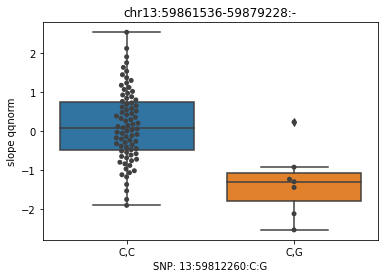

ENSG00000141627.13_chr18_49163787_49257009_-
18:49181422:AT:A


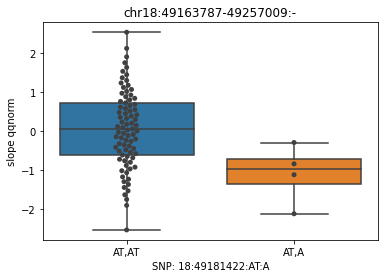

ENSG00000197372.10_chr19_23663158_23687030_-
19:23760671:ATT:A


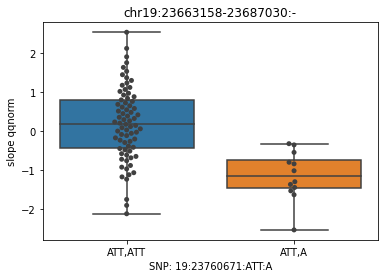

ENSG00000137642.13_chr11_121522989_121532463_+
11:121593621:CCCTTGTTTG:C


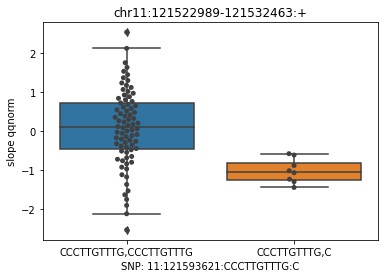

ENSG00000151413.17_chr14_31599379_31673354_+
14:31610780:C:T


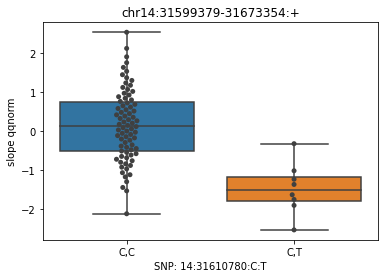

ENSG00000130449.6_chr5_61332948_61472680_+
5:61517304:G:A


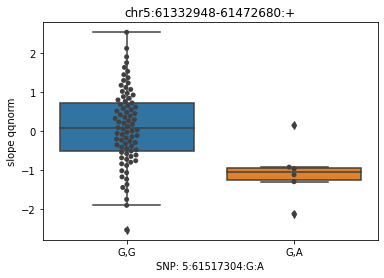

ENSG00000106771.13_chr9_109073438_109080838_-
9:109024075:G:T


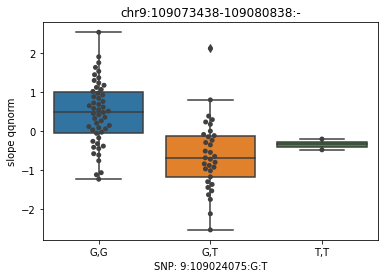

ENSG00000153944.11_chr17_57596950_57615969_+
17:57613341:C:A


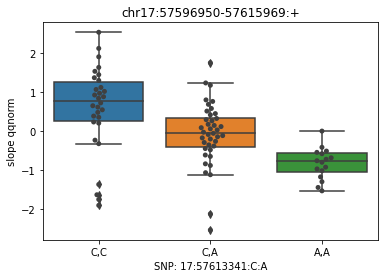

ENSG00000187231.14_chr2_179191866_179264498_-
2:179174942:TAA:T


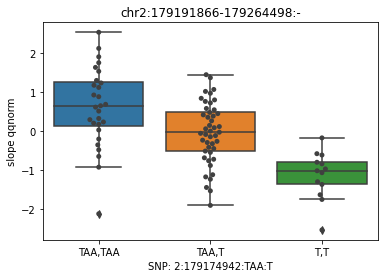

ENSG00000100991.12_chr20_35078174_35092613_-
20:35084320:A:T


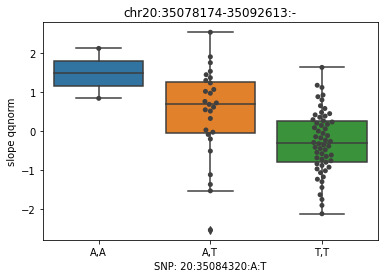

ENSG00000145734.19_chr5_71524323_71532307_+
5:71545840:T:TA


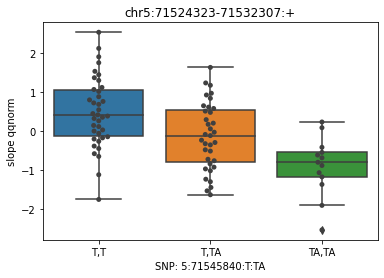

ENSG00000164483.17_chr6_130313093_130365119_-
6:130260408:A:G


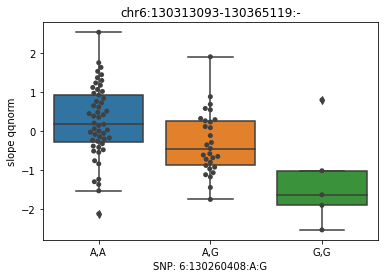

ENSG00000198216.12_chr1_181511510_181577765_+
1:181431091:T:A


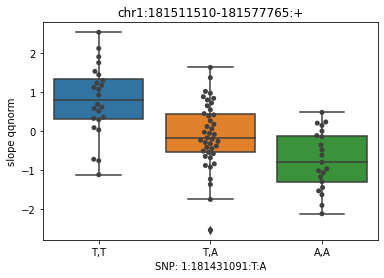

ENSG00000170832.13_chr17_60301704_60345480_-
17:60436879:C:G


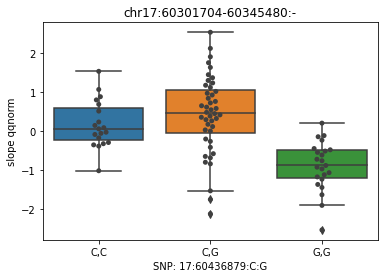

ENSG00000062725.10_chr17_60500487_60525793_-
17:60515112:A:AT


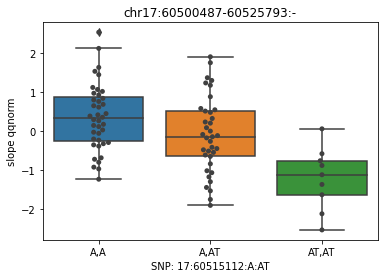

ENSG00000112584.13_chr6_170358318_170388286_+
6:170361258:G:A


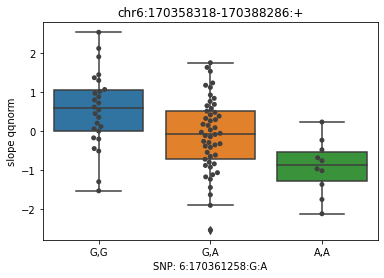

ENSG00000148120.16_chr9_94801002_94923985_+
9:94803579:G:A


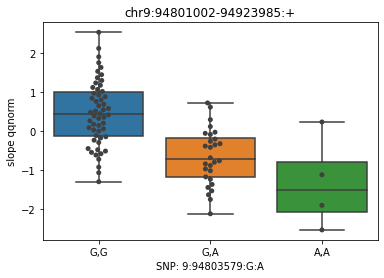

ENSG00000164574.16_chr5_154191025_154294815_+
5:154293610:TATA:T
ENSG00000168461.13_chr18_9708444_9775277_+
18:9710890:G:A


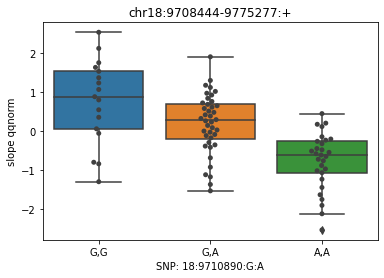

ENSG00000185420.19_chr1_245764149_245858495_-
1:245951167:A:G


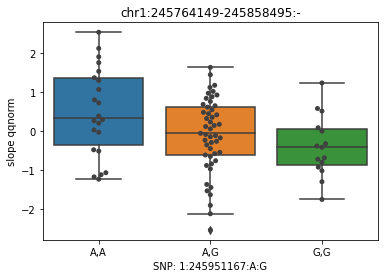

ENSG00000148498.16_chr10_34517159_34696317_-
10:34784456:TG:T


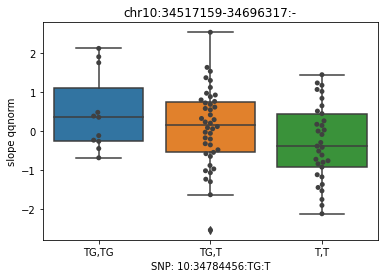

ENSG00000106392.11_chr7_7182820_7234302_+
7:7186143:CTCTT:C


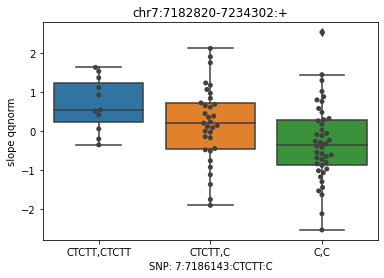

ENSG00000148498.16_chr10_34696419_34814875_-
10:34804035:GTTT:G


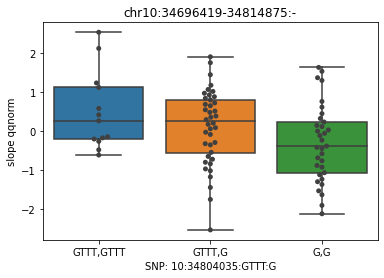

ENSG00000082068.9_chr5_37516590_37605063_+
5:37426950:A:T


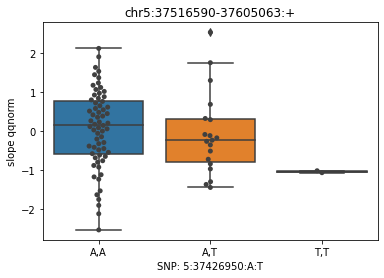

ENSG00000182185.18_chr14_67887204_68291883_+
14:68074029:T:C


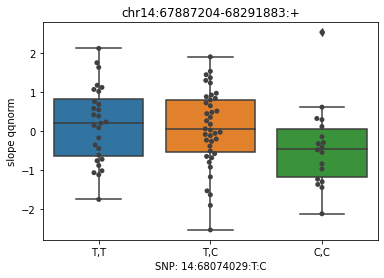

ENSG00000184384.14_chr11_96093517_96341382_-
11:96336038:A:T


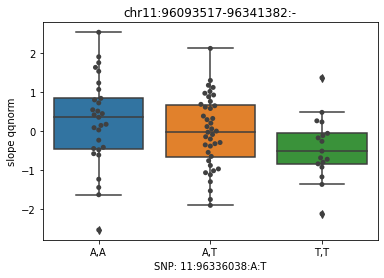

ENSG00000147316.13_chr8_6499929_6621453_+
8:6430345:C:T


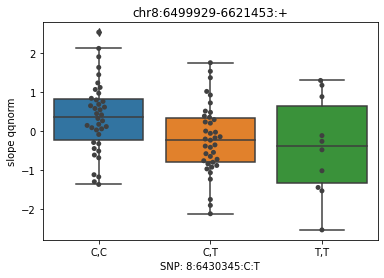

ENSG00000169504.15_chr1_24745625_24797741_+
1:24857185:C:T


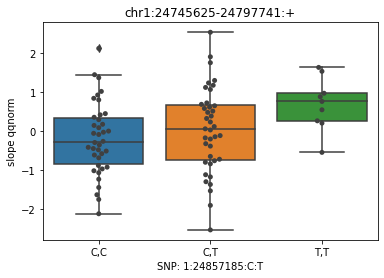

ENSG00000144791.10_chr3_45596287_45636149_+
3:45560733:G:A


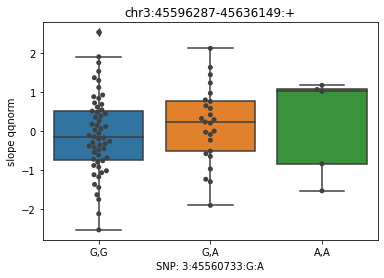

ENSG00000074054.18_chr2_121606180_121649371_-
2:121644346:A:G


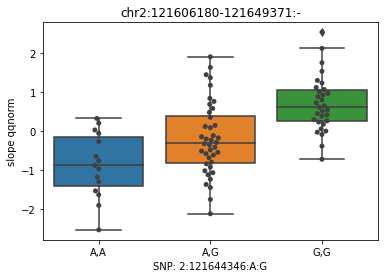

ENSG00000164494.12_chr6_107334332_107458989_-
6:107405846:CA:C


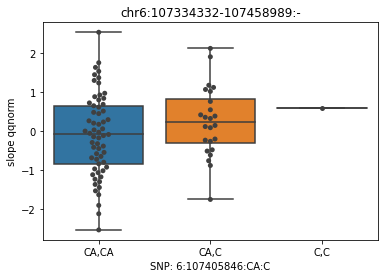

ENSG00000008256.16_chr7_6190531_6272473_-
7:6257212:T:C


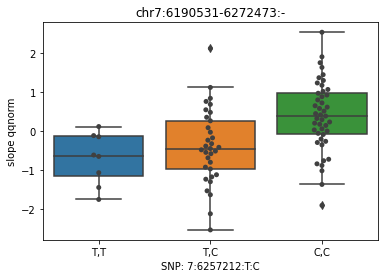

ENSG00000204217.15_chr2_202377550_202464808_+
2:202430722:A:G


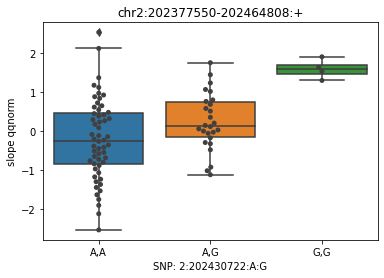

ENSG00000135862.6_chr1_183024134_183103327_+
1:183094939:C:CG


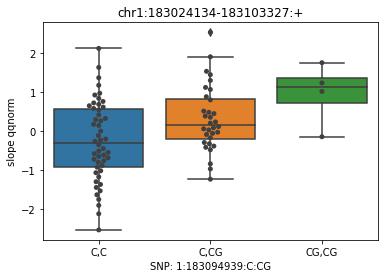

ENSG00000074054.18_chr2_121530325_121605700_-
2:121688700:C:T


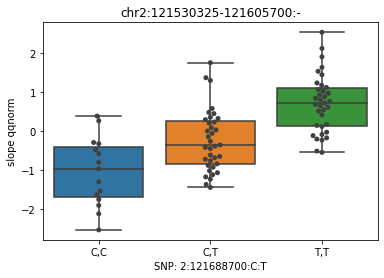

ENSG00000197535.14_chr15_52433285_52528779_-
15:52452846:TA:T


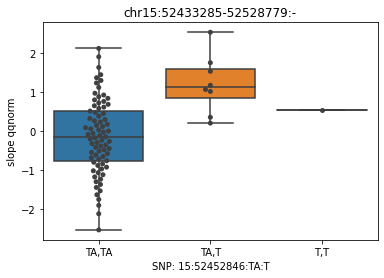

ENSG00000170310.15_chr17_9378653_9491828_-
17:9396665:G:C


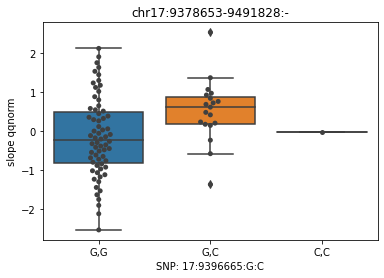

ENSG00000180611.7_chr3_192799650_192917629_-
3:192900531:G:C


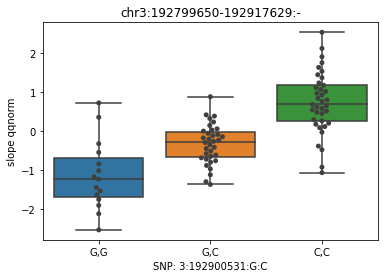

ENSG00000171045.16_chr8_142354763_142403103_-
8:142404143:G:A


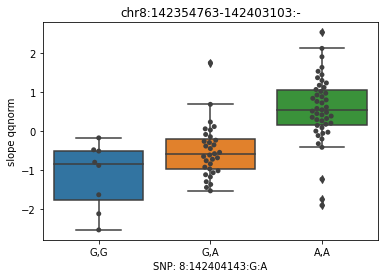

ENSG00000182670.13_chr21_37172744_37182773_+
21:37263872:C:G


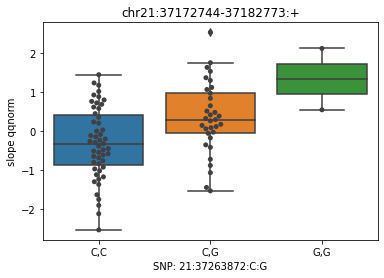

ENSG00000131374.14_chr3_17428519_17508473_-
3:17352698:A:C


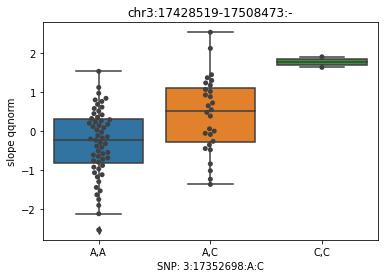

ENSG00000128607.14_chr7_130070809_130096920_+
7:130076465:T:G


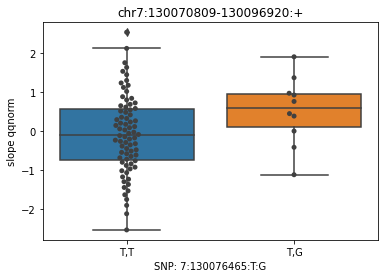

ENSG00000121895.8_chr4_38998909_39032225_-
4:39026377:A:AG


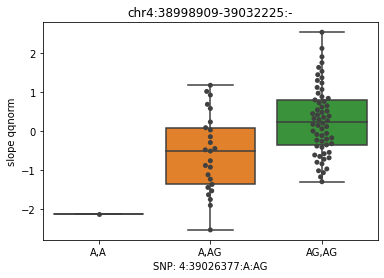

ENSG00000138101.18_chr2_25482873_25531472_-
2:25402553:G:GTC


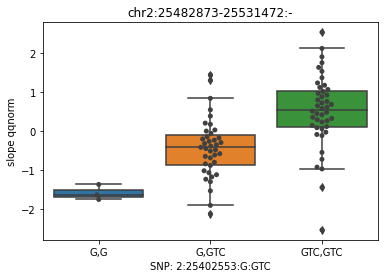

ENSG00000140386.13_chr15_76574284_76621763_-
15:76515331:G:C


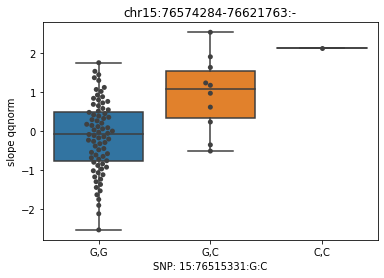

ENSG00000121749.15_chr12_71897941_71907021_+
12:71895390:T:C


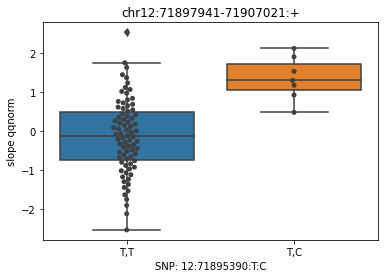

In [227]:
for intron in slopeQTLs.loc[valid_introns].sort_values('slope').index:
    print(intron)
    intron_idx = intron #+ intron.split('_')[0]
    try:
        plot_SNP(vcf, slopes_qqnormed[samples], slopeQTLs, intron_idx)
    except:
        continue

In [55]:
ENSG00000198216.12_chr1_181511510_181577765_+

NA19101.IntronWindows.bed.gz

""
ENSG00000157933.10_chr1_2229735_2302977_+
ENSG00000007923.16_chr1_6681037_6701728_-
ENSG00000171735.19_chr1_7091371_7249490_+
ENSG00000171735.19_chr1_7249626_7467829_+
ENSG00000142599.19_chr1_8365974_8422726_-
...
ENSG00000165661.17_chr9_136226874_136245475_-
ENSG00000169692.13_chr9_136677556_136687175_-
ENSG00000187609.16_chr9_137395404_137423113_-
ENSG00000130653.16_chr9_137484736_137493012_-


In [101]:
cmd = 'zcat ../code/IntronSlopes/IntronWindowCounts/NA19101.IntronWindows.bed.gz | '
cmd += 'grep ENSG00000198216.12_chr1_181511510_181577765_+'
tabla = sp.check_output(cmd, shell=True).decode()

In [110]:
df = pd.DataFrame([x.split('\t') for x in tabla.rstrip().split('\n')])

In [15]:
def processSampleIntron(IndID, intron):
    cmd = 'zcat ../code/IntronSlopes/IntronWindowCounts/{IndID}.IntronWindows.bed.gz | '.format(IndID=IndID)
    cmd += 'grep ' + intron
    tabla = sp.check_output(cmd, shell=True).decode()
    
    df = pd.DataFrame([x.split('\t') for x in tabla.rstrip().split('\n')])
    
    if df[5][0] == '+':
        return [int(x) for x in df[6]]
    else:
        return [int(x) for x in df[6]][::-1]

In [16]:
def plot_slopes_genotype(vcf, slopes, sQTLs, intron):
    
    samples = slopes.columns
    snp = sQTLs.loc[intron, 'var_id']
    dfSNP = pd.DataFrame(vcf.loc[snp, samples])
    dfSNP['slope'] = list(slopes.loc[intron, samples])
    zygosity = []
    
    var1 = snp.split(':')[-2]
    var2 = snp.split(':')[-1]
    
    
    AA = []
    AT = []
    TT = []
    
    
    
    for IndID, row in tqdm(dfSNP.iterrows(), leave=True, position=0):
        
#         print(IndID, intron)
        counts_list = processSampleIntron(IndID, intron)
        
        if row[snp] == '0|0':
            AA.append(counts_list)
        elif ((row[snp] == '0|1') or (row[snp] == '1|0')):
            AT.append(counts_list)
        else:
            TT.append(counts_list)

    return AA, AT, TT

In [19]:
slopes_qqnormed

,#Chr,start,end,gid,strand,NA19214,NA18876,NA19096,NA19153,NA19152,...,NA19130,NA18516,NA18505,NA18852,NA19206,NA19098,NA19200,NA19146,NA19095,NA18917
pid,,,,,,,,,,,,,,,,,,,,,
ENSG00000157933.10_chr1_2229735_2302977_+:ENSG00000157933.10,chr1,2128318,2410213,ENSG00000157933.10,+,0.115504,1.364489,-1.441564,0.028816,1.116127,...,1.171546,-0.720423,1.528305,0.720423,1.014499,0.086543,0.383769,-1.014499,-0.028816,-0.612465
ENSG00000007923.16_chr1_6681037_6701728_-:ENSG00000007923.16,chr1,6534167,6801924,ENSG00000007923.16,-,0.115504,0.922396,-0.203070,-0.797282,1.899709,...,2.527302,-2.114381,0.797282,0.000000,0.173741,0.578068,0.203070,0.647604,-0.115504,-0.683560
ENSG00000171735.19_chr1_7091371_7249490_+:ENSG00000171735.19,chr1,6685453,7869706,ENSG00000171735.19,+,0.028816,0.837523,-1.748025,0.797282,0.758293,...,-0.446588,-0.322431,1.441564,2.114381,1.899709,-1.230818,-0.683560,-0.028816,0.446588,-0.144561
ENSG00000171735.19_chr1_7249626_7467829_+:ENSG00000171735.19,chr1,6685453,7869706,ENSG00000171735.19,+,0.115504,0.203070,0.173741,0.144561,0.446588,...,-0.028816,-0.612465,1.899709,-0.446588,1.014499,0.383769,1.364489,-0.057656,0.922396,-1.899709
ENSG00000142599.19_chr1_8365974_8422726_-:ENSG00000142599.19,chr1,8252396,8948921,ENSG00000142599.19,-,-2.527302,-0.837523,-0.115504,1.063939,-0.292225,...,1.116127,-0.683560,1.294762,0.758293,-1.628361,-0.544341,1.628361,-0.758293,-0.967422,0.086543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000165661.17_chr9_136226874_136245475_-:ENSG00000165661.17,chr9,136106332,136345812,ENSG00000165661.17,-,-0.352934,1.628361,-0.578068,0.837523,-1.748025,...,2.114381,-2.114381,-1.441564,-0.028816,1.014499,0.383769,-0.446588,0.922396,0.797282,0.028816
ENSG00000169692.13_chr9_136677556_136687175_-:ENSG00000169692.13,chr9,136573142,136787457,ENSG00000169692.13,-,1.014499,0.683560,-1.748025,0.478655,-0.758293,...,-0.352934,-0.173741,1.748025,2.114381,-0.232574,-1.171546,-0.578068,-1.528305,-0.057656,-0.837523
ENSG00000187609.16_chr9_137395404_137423113_-:ENSG00000187609.16,chr9,137206895,137523211,ENSG00000187609.16,-,0.612465,0.683560,-1.899709,-0.414974,0.414974,...,2.114381,-2.527302,0.797282,-0.446588,1.063939,0.322431,-0.683560,0.383769,1.014499,0.232574


ENSG00000134852.15_chr4_55510065_55545452_-
4:55530648:G:A


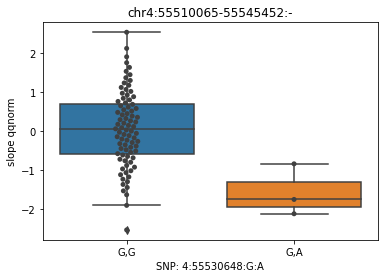

87it [03:58,  2.74s/it]


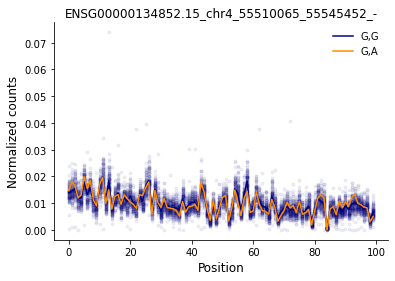

ENSG00000139734.19_chr13_59861536_59879228_-
13:59812260:C:G


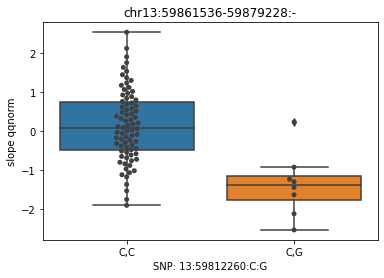

87it [04:00,  2.76s/it]


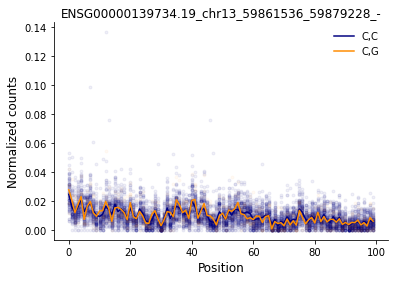

ENSG00000141627.13_chr18_49163787_49257009_-
18:49181422:AT:A


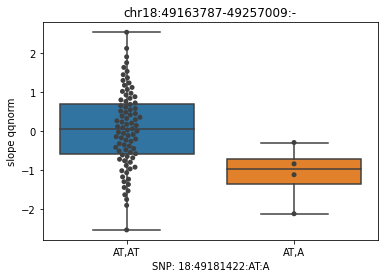

87it [03:57,  2.73s/it]


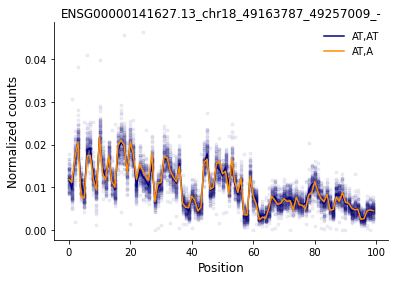

ENSG00000197372.10_chr19_23663158_23687030_-
19:23760671:ATT:A


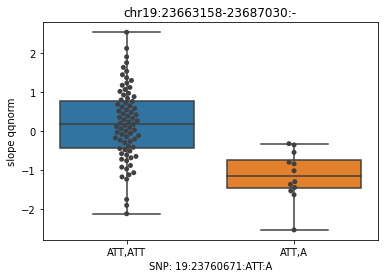

87it [03:59,  2.75s/it]


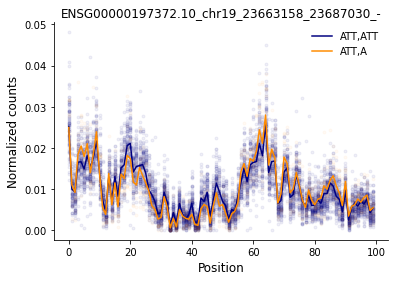

ENSG00000137642.13_chr11_121522989_121532463_+
11:121593621:CCCTTGTTTG:C


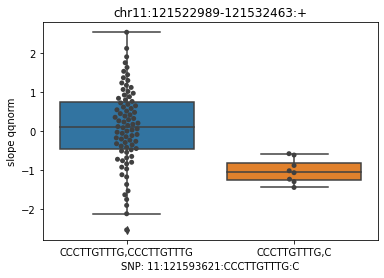

87it [03:58,  2.74s/it]


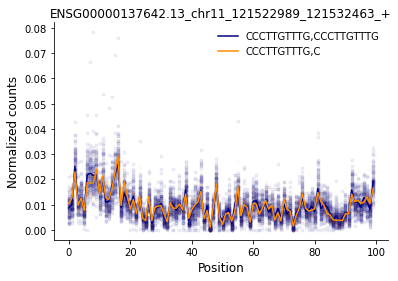

ENSG00000151413.17_chr14_31599379_31673354_+
14:31610780:C:T


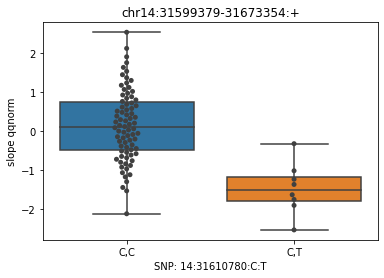

87it [03:58,  2.74s/it]


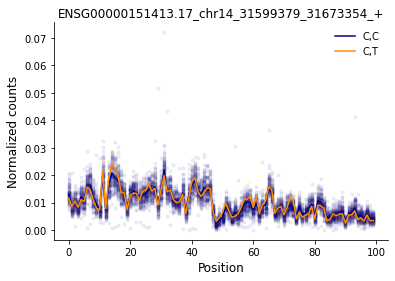

ENSG00000130449.6_chr5_61332948_61472680_+
5:61517304:G:A


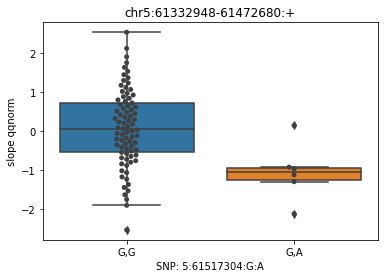

87it [04:00,  2.76s/it]


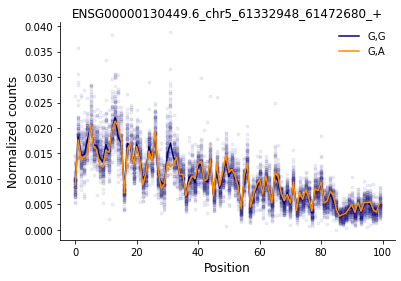

ENSG00000106771.13_chr9_109073438_109080838_-
9:109024075:G:T


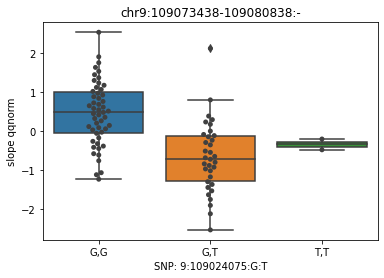

87it [03:58,  2.74s/it]


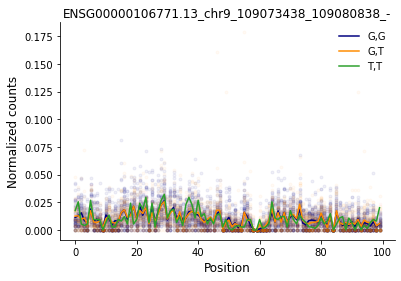

ENSG00000153944.11_chr17_57596950_57615969_+
17:57613341:C:A


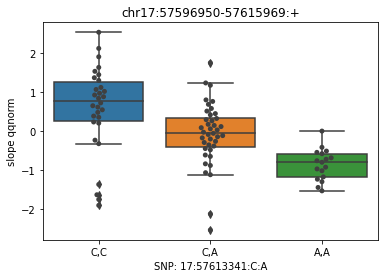

87it [04:02,  2.79s/it]


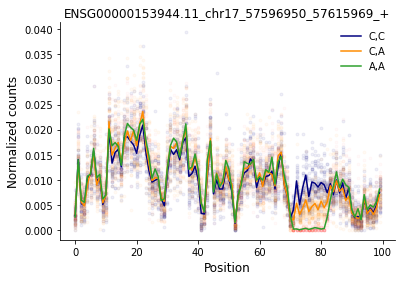

ENSG00000187231.14_chr2_179191866_179264498_-
2:179174942:TAA:T


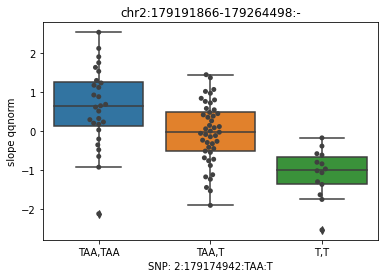

87it [04:00,  2.76s/it]


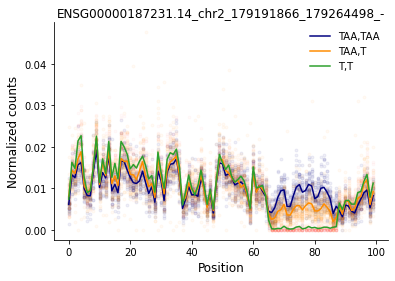

ENSG00000100991.12_chr20_35078174_35092613_-
20:35084320:A:T


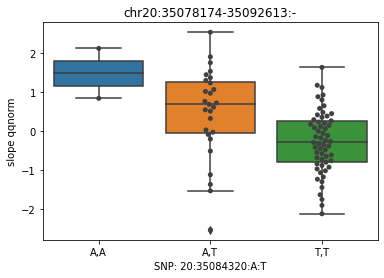

87it [03:59,  2.75s/it]


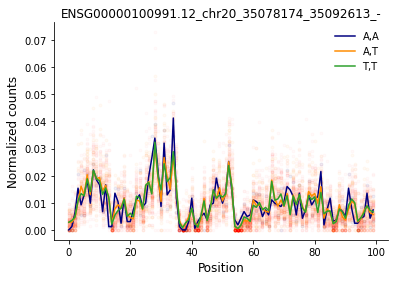

ENSG00000145734.19_chr5_71524323_71532307_+
5:71545840:T:TA


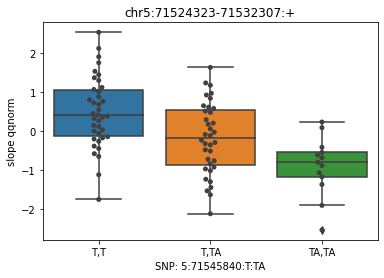

87it [03:58,  2.74s/it]


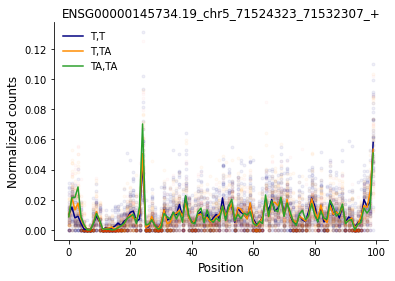

ENSG00000164483.17_chr6_130313093_130365119_-
6:130260408:A:G


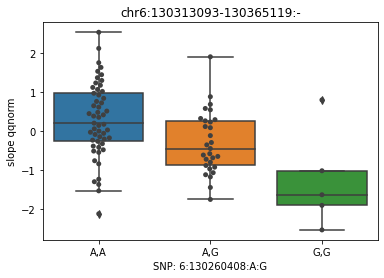

23it [01:03,  2.78s/it]

In [ ]:
# processSampleIntron('NA19101', 'ENSG00000198216.12_chr1_181511510_181577765_+')


# plot_slopes_genotype(vcf, slopes, sQTLs, intron)


for intron in slopeQTLs.loc[valid_introns].sort_values('slope').index:
    print(intron)
    intron_idx = intron #+ intron.split('_')[0]
#     try:
    v1, v2 = plot_SNP(vcf, slopes_qqnormed[samples], slopeQTLs, intron_idx)


    listas = plot_slopes_genotype(vcf, slopes_qqnormed[samples], slopeQTLs, intron)


    fig, ax = plt.subplots()
    
    if len(listas[0])>0:
        for l in listas[0]:
            n = np.sum(l)
            ax.scatter(range(100), np.array(l)/np.sum(l), c='navy', alpha=0.06, marker='.')

    if len(listas[1])>0:
        for l in listas[1]:
            n = np.sum(l)
            ax.scatter(range(100), np.array(l)/np.sum(l), c='darkorange', alpha=0.04, marker='.')

    if len(listas[2])>0:
        for l in listas[2]:
            n = np.sum(l)
            ax.scatter(range(100), np.array(l)/np.sum(l), c='red', alpha=0.02, marker='.')


    if len(listas[0])>0:
        ax.plot(range(100), np.array(listas[0]).sum(axis=0)/np.array(listas[0]).sum().sum(), c='navy', label=v1+','+v1)
    if len(listas[1])>0:
        ax.plot(range(100), np.array(listas[1]).sum(axis=0)/np.array(listas[1]).sum().sum(), c='darkorange', label=v1+','+v2)
    if len(listas[2])>0:
        ax.plot(range(100), np.array(listas[2]).sum(axis=0)/np.array(listas[2]).sum().sum(), c=x[2], label=v2+','+v2)

    ax.set_title(intron)
    ax.set_xlabel('Position', size=12)
    ax.set_ylabel('Normalized counts', size=12)

    ax.legend(frameon=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()

#     except:
#         continue

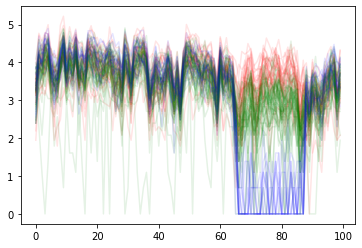

In [246]:
for l in listas[0]:
    n = np.sum(l)
    plt.plot(range(100), np.log1p(np.array(l)), c='red', alpha=0.1)
    
for l in listas[1]:
    n = np.sum(l)
    plt.plot(range(100), np.log1p(np.array(l)), c='green', alpha=0.1)
    
for l in listas[2]:
    n = np.sum(l)
    plt.plot(range(100), np.log1p(np.array(l)), c='blue', alpha=0.1)

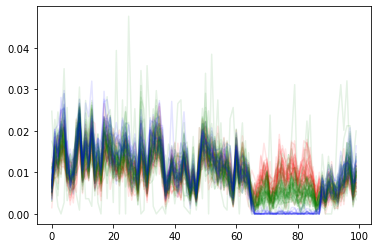

In [247]:
for l in listas[0]:
    n = np.sum(l)
    plt.plot(range(100), np.array(l)/np.sum(l), c='red', alpha=0.1)
    
for l in listas[1]:
    n = np.sum(l)
    plt.plot(range(100), np.array(l)/np.sum(l), c='green', alpha=0.1)
    
for l in listas[2]:
    n = np.sum(l)
    plt.plot(range(100), np.array(l)/np.sum(l), c='blue', alpha=0.1)

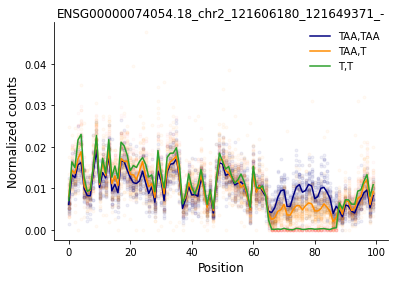

In [249]:
fig, ax = plt.subplots()
for l in listas[0]:
    n = np.sum(l)
    ax.scatter(range(100), np.array(l)/np.sum(l), c='navy', alpha=0.06, marker='.')
    
for l in listas[1]:
    n = np.sum(l)
    ax.scatter(range(100), np.array(l)/np.sum(l), c='darkorange', alpha=0.04, marker='.')
    
for l in listas[2]:
    n = np.sum(l)
    ax.scatter(range(100), np.array(l)/np.sum(l), c='red', alpha=0.02, marker='.')
    
    
ax.plot(range(100), np.array(listas[0]).sum(axis=0)/np.array(listas[0]).sum().sum(), c='navy', label='TAA,TAA')
ax.plot(range(100), np.array(listas[1]).sum(axis=0)/np.array(listas[1]).sum().sum(), c='darkorange', label='TAA,T')
ax.plot(range(100), np.array(listas[2]).sum(axis=0)/np.array(listas[2]).sum().sum(), c=x[2], label='T,T')

ax.set_title('ENSG00000074054.18_chr2_121606180_121649371_-')
ax.set_xlabel('Position', size=12)
ax.set_ylabel('Normalized counts', size=12)

ax.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

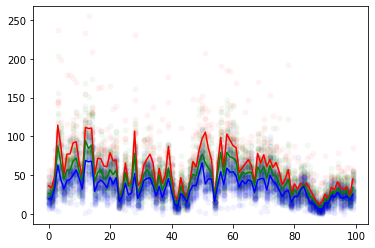

In [203]:
for l in listas[0]:
    n = np.sum(l)
    plt.scatter(range(100), np.array(l), c='red', alpha=0.05, linewidth=0)
    
for l in listas[1]:
    n = np.sum(l)
    plt.scatter(range(100), np.array(l), c='green', alpha=0.05, linewidth=0)
    
for l in listas[2]:
    n = np.sum(l)
    plt.scatter(range(100), np.array(l), c='blue', alpha=0.05, linewidth=0)
    
    
plt.plot(range(100), np.array(listas[0]).mean(axis=0), c='red')
plt.plot(range(100), np.array(listas[1]).mean(axis=0), c='green')
plt.plot(range(100), np.array(listas[2]).mean(axis=0), c='blue')

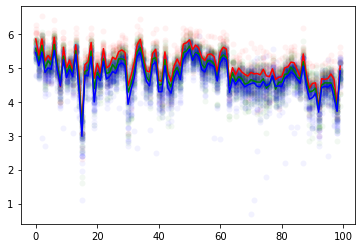

In [195]:
for l in listas[0]:
    n = np.sum(l)
    plt.scatter(range(100), np.log1p(np.array(l)), c='red', alpha=0.05, linewidth=0)
    
for l in listas[1]:
    n = np.sum(l)
    plt.scatter(range(100), np.log1p(np.array(l)), c='green', alpha=0.05, linewidth=0)
    
for l in listas[2]:
    n = np.sum(l)
    plt.scatter(range(100), np.log1p(np.array(l)), c='blue', alpha=0.05, linewidth=0)
    
    
plt.plot(range(100), np.log1p(np.array(listas[0]).mean(axis=0)), c='red')
plt.plot(range(100), np.log1p(np.array(listas[1]).mean(axis=0)), c='green')
plt.plot(range(100), np.log1p(np.array(listas[2]).mean(axis=0)), c='blue')